<h1>A simple demonstration of an unsupervised learning [K-Means Clustering] algorithm followed by a supervised learning algorithm's application on the produced clustered data.</h1>

In [1]:
import matplotlib.pyplot as plt # required for plots/figures

<h1>Dataset [point (x,y) format] - only 8 of them</h1>

Input as a <class 'list'>
Element of an input: <class 'tuple'>


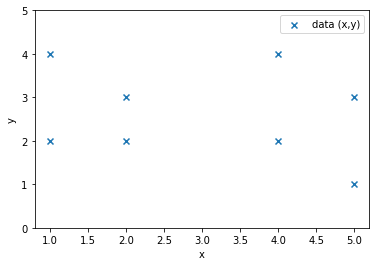

In [2]:
# some arbitrary two-dimensional points: these points will be divided into clusters
points_list = [(1, 2),(4, 4),(2, 2),(1, 4),(5, 1),(2, 3),(4, 2),(5, 3)]

## just draw the points as a scatter list
## exploratory data analysis.....can give you an idea of choosing K?
print('Input as a {}\nElement of an input: {}'.format(type(points_list), type(points_list[0])))

lst_x = [xy[0] for xy in points_list] # x coorindates
lst_y = [xy[1] for xy in points_list] # y coorindates

plt.scatter(lst_x, lst_y, marker='x',
           label='data (x,y)')
plt.legend()
plt.ylim(0, max(lst_y)+1)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

<h2>1. K-Means Clustering [Implementation from Scratch]</h2>
In this notebook, we will demonstrate KMeans Clustering concept by implementing the algorithm ourselves. The target is to 'cluster' the point dataset. By just looking at the plot, it is intuitive that there could be two different clusters. We will also look at a method to find the optimum/appropriate value of K for this approach. Note that, KMeans is readily available from various libraries, e.g., scikit-learn implementation <a href="https://scikit-learn.org/stable/modules/clustering.html#k-means">here</a> or even in OpenCV library [computer vision] <a href="https://docs.opencv.org/master/d1/d5c/tutorial_py_kmeans_opencv.html">here</a>. One application of OpenCV's implementation is demonstrated in this notebook <a href="kmeans-clustering-segmentation.ipynb">here</a>.<br/>

<strong>Algorithm pseudocode</strong><br/>
Input: a list of tuples (x, y)<br/>
Output: a dictionary indexed by the classes (or clusters), inside each class a list of member points (x, y)<br/>
1. Pick K points randomly from the list (initial centroids of the K-clusters)<br/>
2. for each point (x, y) inside the list, compute distance from the K centroids, and assign the point (x,y)'s membership to the closet centroid<br/>
3. Update the K-centroids as the average of all the members points within it<br/>
4. Repeat steps 2 and 3 until the centroids between two epochs do not change.

<h4>1.1 Helper functions (for K-Means and KNN algorithms)</h4>

In [3]:
from sys import maxsize

# manhattan distance between two points (x1, y1) and (x2, y2)
def computeDistance(point1, point2):
    return (abs(point1[0]-point2[0])+abs(point1[1]-point2[1]))

# input: two centroids, return True if they are not the same
# if same, return false
def notSameCentroid(centroid1, centroid2):
    dist = 0
    for i in range(len(centroid1)):
        dist += computeDistance(centroid1[i], centroid2[i])
    return dist != 0

# argument, centroids and a point
# return the class corresponding to the centroid that is closest match
# in case of tie, put it inside the first cluster/centroid class
def classMembership(centroids, point):
    memberDist = -1, maxsize # initial condition
    for i in range(len(centroids)):
        dist = computeDistance(centroids[i], point)
        if(dist < memberDist[1]): # update membership if this centroid is closer
            memberDist = i, dist
    return memberDist[0]

# compute and return the mean of a list of two-dimensional tuples along both axes, (mean_x, mean_y)
def computeMean(lst):
    tupSum = 0, 0 # keeping the sum of x's, and y's as a tuple
    N = len(lst)
    for i in range(N):
        tup = lst[i]
        tupSum = tupSum[0]+tup[0], tupSum[1]+tup[1]
    return tupSum[0]/N, tupSum[1]/N # return the mean/average as the new centroid

<h4>1.2 K-Means Implementation</h4>

In [4]:
from random import sample, seed

seed(1) # ensuring the 'same' random selection
K = 2 # number of clusters
centroids = sample(points_list, K) # random selection of initial clusters
pCentroids = []  # for the terminating condition check: the centroids between two subsequent epochs are the same
for i in range(K):
    pCentroids.append((maxsize, maxsize))

epoch = 0 # to hold the number of epoch required for convergence
epoch_lst = [] # to keep all the points and class membership across the epochs: for drawing graph
centroids_lst = [] # list of centroids of the clusters over the epochs: again for drawing graph
while notSameCentroid(centroids, pCentroids):
    points = {} # this is the ultimate dictionary which will contain the results, class: [(x1, y1), (x2, y2)] format
    for point in points_list: # assign membership of each point to a cluster
        member = classMembership(centroids, point) # obtain the membership/cluster of a point/data
        lst = []
        if member in points:
            lst = points[member] # if that cluster already exists, get the reference
        lst.append(point) # add the new point/data to this cluster
        points[member] = lst # update the cluster's members
    # recompute the centroids
    pCentroids = centroids.copy() # keep track of the previous centroid for terminating condition
    for i in range(K):
        lst = points[i]
        centroids[i] = computeMean(lst) # the mean of the members of the clusters as the new centroid
    epoch_lst.append(points)
    centroids_lst.append(centroids.copy())
    epoch += 1
    print('After Epoch {}:\nPrevious Centroids: {} and New Centroids: {}'.format(epoch, pCentroids, centroids))

After Epoch 1:
Previous Centroids: [(2, 2), (5, 1)] and New Centroids: [(2.3333333333333335, 2.8333333333333335), (5.0, 2.0)]
After Epoch 2:
Previous Centroids: [(2.3333333333333335, 2.8333333333333335), (5.0, 2.0)] and New Centroids: [(2.0, 3.0), (4.666666666666667, 2.0)]
After Epoch 3:
Previous Centroids: [(2.0, 3.0), (4.666666666666667, 2.0)] and New Centroids: [(1.5, 2.75), (4.5, 2.5)]
After Epoch 4:
Previous Centroids: [(1.5, 2.75), (4.5, 2.5)] and New Centroids: [(1.5, 2.75), (4.5, 2.5)]


<h4>Output of K-Means algorithm on the sample data</h4>

2 Clusters:
{0: [(1, 2), (2, 2), (1, 4), (2, 3)], 1: [(4, 4), (5, 1), (4, 2), (5, 3)]}


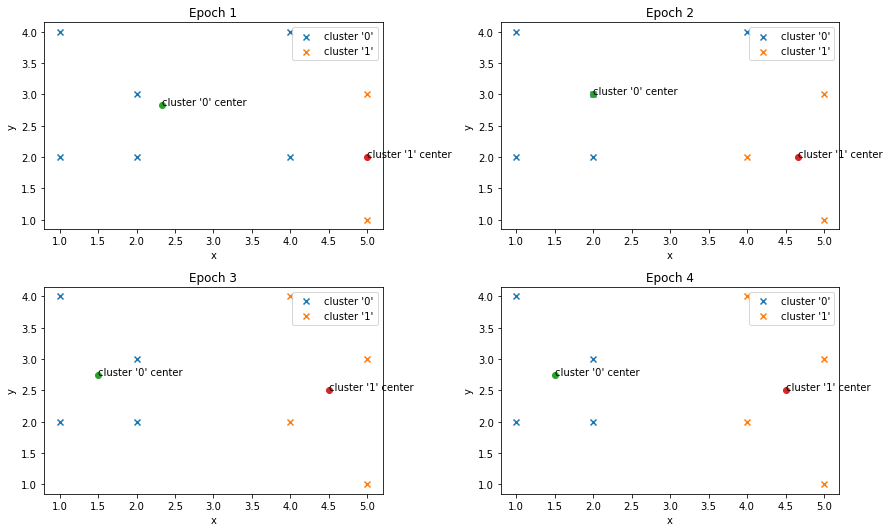

In [5]:
# for the current dataset, two classes: 0, 1 
# each having 4 members: this is the outuput of an unsupervised learning [K-means clustering]
print('{} Clusters:\n{}'.format(K, points))

# for the current input setting, the output should be this:
#points = {0: [(1, 2),(1, 4),(2, 2),(2, 3)],
#        1: [(4, 2),(4, 4),(5, 1),(5, 3)]}

_ = plt.figure(figsize=(12.5, 7.5))
plot_grid = 221 # you may need to change this part if there are more figures to show!!! For example, if you change the input data, value of K etc.

# traverse through the class elements (2D points)
# and scatter plot to show the classes/clusters for each epoch
for i in range(len(epoch_lst)):
#for i in range(1):
    ax =  plt.subplot(plot_grid)
    for key, val in epoch_lst[i].items():
        # spearate the x and y of the point (x, y) inside individual list
        lst_x = [xy[0] for xy in val] # x coorindates
        lst_y = [xy[1] for xy in val] # y coorindates
        ax.scatter(lst_x, lst_y, marker='x',
            label="cluster '{0}'".format(key))
    for j in range(K): # drawing the K centroids
        centroid_txt = "cluster '{}' center".format(j)
        ax.scatter(centroids_lst[i][j][0], centroids_lst[i][j][1], marker='o') # drawing the centroids/cluster centers
        ax.annotate(centroid_txt, (centroids_lst[i][j][0], centroids_lst[i][j][1])) # the texts related to centroids/cluster centers
    plt.title('Epoch {}'.format(i+1))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc='best')
    plot_grid = plot_grid + 1
plt.tight_layout()
plt.show()

<h2>2. KMeans Clustering [Scikit-Learn Implementation]</h2>
In this part, we will apply scikit-learn's KMeans algorithm implementation <a href='https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html'>here</a> to obtain the same results. We will also look how to select an appropriate value of K [cluster size] - <strong>Elbow Method</strong>.

In [6]:
import pandas as pd
from sklearn.cluster import KMeans

In [7]:
# converting the points_list into a dataframe
df = pd.DataFrame({'x': [x[0] for x in points_list], 'y': [x[1] for x in points_list]}, columns=['x', 'y'])
# showing it as a transpose dataframe: note that x, y are actually columns in the original df
df.transpose().head(8)

,0,1,2,3,4,5,6,7
x,1,4,2,1,5,2,4,5
y,2,4,2,4,1,3,2,3


In [8]:
# n_clusters: determines the clusters, creating a new column 'cluster' inside the dataframe
df['cluster'] = KMeans(n_clusters=2, init="k-means++").fit_predict(df)
# again showing it as a transpose dataframe: you will find that they are the same as computed in the previous section
# the cluster indicator '0' or '1' might be swapped 
df.transpose().head()

,0,1,2,3,4,5,6,7
x,1,4,2,1,5,2,4,5
y,2,4,2,4,1,3,2,3
cluster,1,0,1,1,0,1,0,0


<h4>2.1 Elbow Method</h4>
Steps:<br/>
For different cluster (K) values, compute K-Means clusters<br/>
For each K, calculate the total within-cluster sum of square (WCSS) distance<br/>
Plot the WCSS versus K<br/>
The location of a <strong>bend</strong> inside the plot indicates the optimum cluster number (in our case, K=2 which we have used in the previous cells).

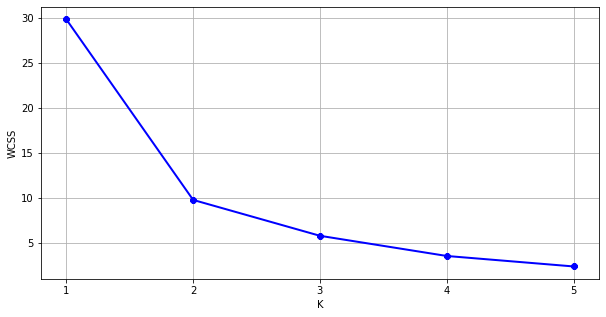

In [9]:
wcss = [] # storing the within-cluster sum of square (WCSS) distances
for k in range(1,6): # different values of K = 1, 2, 3, 4, 5
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df)
    wcss.append(kmeans.inertia_) # member variable inertia_ contains the WCSS for that particular K
plt.figure(figsize=(10,5))    
plt.grid()
plt.plot(range(1,6),wcss, linewidth=2, color="blue", marker ="8")
plt.xlabel("K")
plt.xticks([x for x in range(1, 6)])
plt.ylabel("WCSS")
plt.show()

<h2>3. K-Nearest Neighbor (Self-Study)</h2>
This is just a simple demonstration of K-Nearest Neighbor algorithm's working. Again, its implementation is available from the scikit-learn library - documentation <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html">here</a>.<br/>

Problem statement:<br/>
Input: a 2D point (x, y)<br/>
Data Structure [training set in the form of a dictionary- the above <b>points</b> variable] - a list of 2D points tuple (val) indexed by classes/clusters [0 or 1] (key)<br/>
Output: the list of K nearest points, and the identified class

<h4>3.1 KNN Implementation</h4>

In [10]:
# implement K-Nearest Neighbor
# argument is the points data structure, and output should be 
# set of K nearest matches, and the identified class [majority voting]
# e.g., if K=1, output should be the nearest match


# Heap data structure
# Python documentation of Heap can be found in:
# https://docs.python.org/3/library/heapq.html
import heapq

# algorithm: compute distance from point to each point inside points data structure
# create priority queue using 'distance' as the key
# retrieve the first K elements from the priority queue, and output the average
# if unfamiliar with Priority Queue data structure, then, https://docs.python.org/3/library/heapq.htm
# for classification, return the majority vote of the classes of the K elements
def KNearestNeighbor(points, K, point):
    #PQ: data structure will hold class, index and the distance to point [tuple]
    Q = []
    for key, lst in points.items():
        for ind in range(len(lst)):
            dist = computeDistance(lst[ind], point)
            heapq.heappush(Q, (dist, ind, key)) # the order of insertion dictates the key, here priority=dist
            #print(key, ind, dist)

    Kitems = [] # hold the K nearest points
    clusters = {} # clusters: vote data structure in the form of dictionary
    # iterating over to retrieve the K nearest points
    for i in range(K):
        if not Q: # no item inside the Queue [K >> greater than training dataset!!!]
            break # this should be an exception: not handled inside the current implementation
        tup = heapq.heappop(Q)
        Kitems.append(points[tup[2]][tup[1]])
        vote = clusters.get(tup[2], 0)
        clusters[tup[2]] = vote+1
    # returning the list of points
    # and also the class where it is classified: majority voting class (for a tie of class membership votes, depending on max function implementation, can return any class!)
    return Kitems, max(clusters, key=clusters.get)
    #return Kitems, max(classes.items(), key=lambda x:x[1])

<h4>3.2 Inference using KNN</h4>

In [11]:
K = 2 # K of K-nearest neighbors: change it to see different impacts...
point = (2, 3) # testing sample : change it to test its membership to the cluster
result = KNearestNeighbor(points, K, point) # calling our K-NearestNeighbor implementation above
print('The identified cluster of {} is: {}'.format(point, result[1]))
print('The nearest neighbors identified as: ', result[0])

The identified cluster of (2, 3) is: 0
The nearest neighbors identified as:  [(2, 3), (2, 2)]


<h2>Conclusion</h2>
<ul>
    <li>Change the value <b>K</b> in both algorithms to see the impact. Also, the initial 'points_list' dataset, try to add more points to observe different results.</li>
    <li>One issue of the current K-Means algorithm is the random selection of the 'initial' centroids. This may result in undesired clusters just because of this step. Implement K-Means++ algorithm (consult the reference list) which tries to obtain the initial centroids with good spread. For the scikit-learn implementation, it is already achived by the option <em>init=k-means++</em> which we have used above.</li>
</ul>
<h2>References</h2>
<ul>
    <li>Sebastian Raschka, <a href='https://sebastianraschka.com/books.html'>Python Machine Learning, 3rd Edition</a></li>
    <li>A Programmer's Guide to Data Mining, <a href='http://guidetodatamining.com/chapter8/'>Chapter 8, Clustering</a></li>
    <li>Scikit-Learn's KMeans Documentation <a href='https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html'>here</a></li>
</ul>